# MatPlotLib in Python II

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp
# interactive plots
import ipywidgets as widgets
from IPython.display import display
from ipywidgets import interact, interactive, fixed, interact_manual, IntSlider

## Adding Interactive Slider

In [5]:
@interact(a = IntSlider(10, 1, 100, 10), b = (0.01, 1, 0.01))
def plotting1(a, b):
    print(a, b)
    x = np.arange(0, a, b)
    plt.plot(x, np.sin(x), x, np.cos(x))
    plt.show()

A Jupyter Widget

In [6]:
@interact_manual(a = IntSlider(10, 1, 100, 10), b = (0.01, 1, 0.01))
def plotting2(a, b):
    print(a, b)
    x = np.arange(0, a, b)
    plt.plot(x, np.sin(x), x, np.cos(x))
    plt.show()

A Jupyter Widget

In [9]:
@interact(a = (0, 10, 0.1))
def plotting3(a):
    x = sp.Symbol('x')
    sp.pprint(x**a, use_unicode = False)
    r = np.arange(0, 10, 0.1)
    plt.plot(r, r**a)
    plt.show()

A Jupyter Widget

## WordColud

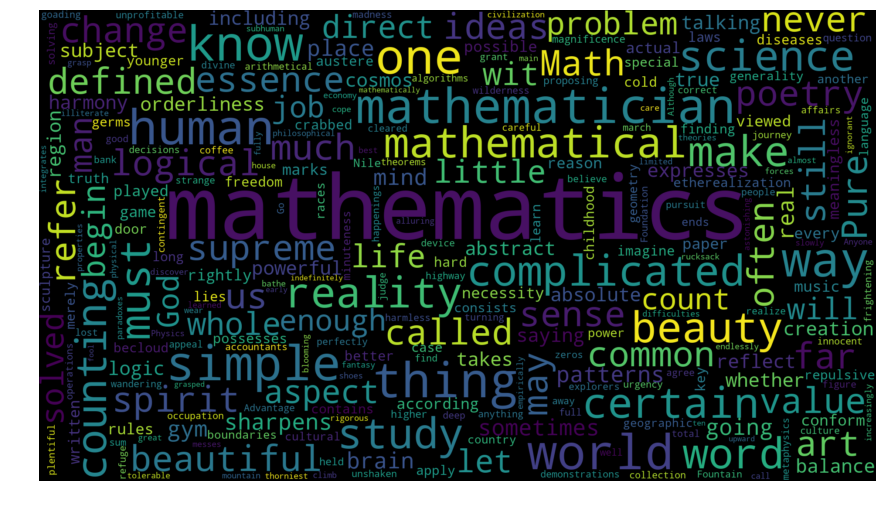

In [22]:
from wordcloud import WordCloud
f = open('Sample.txt', 'r')
text = f.read()
f.close()

w = WordCloud(width = 1920, height = 1080, max_words = 1000).generate(text)
plt.figure(figsize = (15, 10))
plt.imshow(w, interpolation = "bilinear")
plt.axis("off")
plt.savefig('math.png')
plt.show()

### Masking

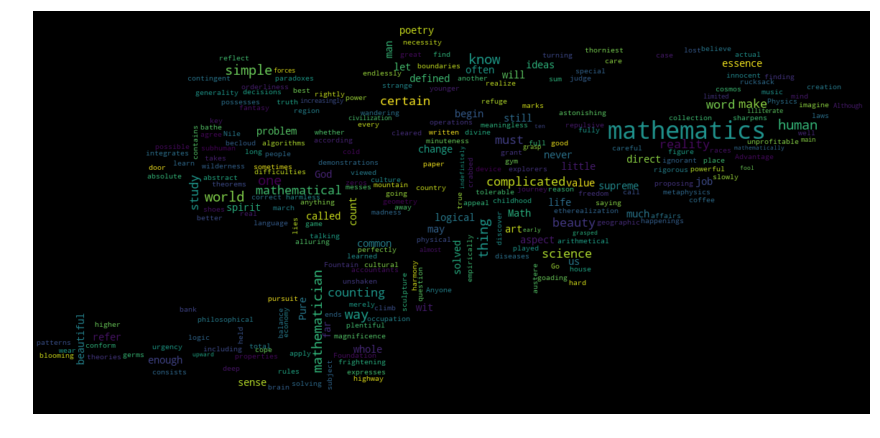

In [26]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from os import path
from PIL import Image
import numpy as np
import random
import string

f = open('Sample.txt', 'r')
text = f.read()
f.close()


d = path.dirname('./')
kg_mask = np.array(Image.open(path.join(d, "kg.png")))


wordcloud = WordCloud(width = 1920, height = 1080, max_words = 1000, mask = kg_mask).generate(text)
plt.figure(figsize = (15, 10))
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis("off")
plt.savefig('math_masked.png')
plt.show()


### Adding Annotation

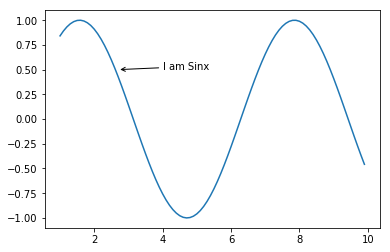

In [34]:
x = np.arange(1, 10, 0.1)
fig, ax = plt.subplots()
ax.annotate("I am Sinx",
            xy=(2.7, 0.5), xycoords='data',
            xytext=(4, 0.5), textcoords='data',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3"),
            )
plt.plot(x, np.sin(x))
plt.show()

### Different Scatter

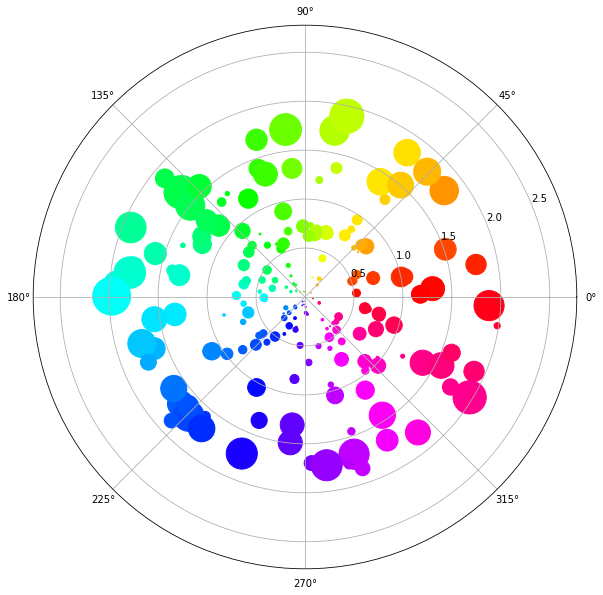

In [49]:
n_points = 200

radius   = 2 * np.random.rand(n_points)
angles   = 2 * (np.pi) * np.random.rand(n_points)
area     = 400 * (radius**2) * np.random.rand(n_points)

colors = angles

fig = plt.figure(figsize=(20,10))
ax  = plt.subplot(111, polar=True)

c = plt.scatter(angles, radius, c=colors, s=area, cmap=plt.cm.hsv)
c.set_alpha(1.95)

plt.show()

### 3D Figures

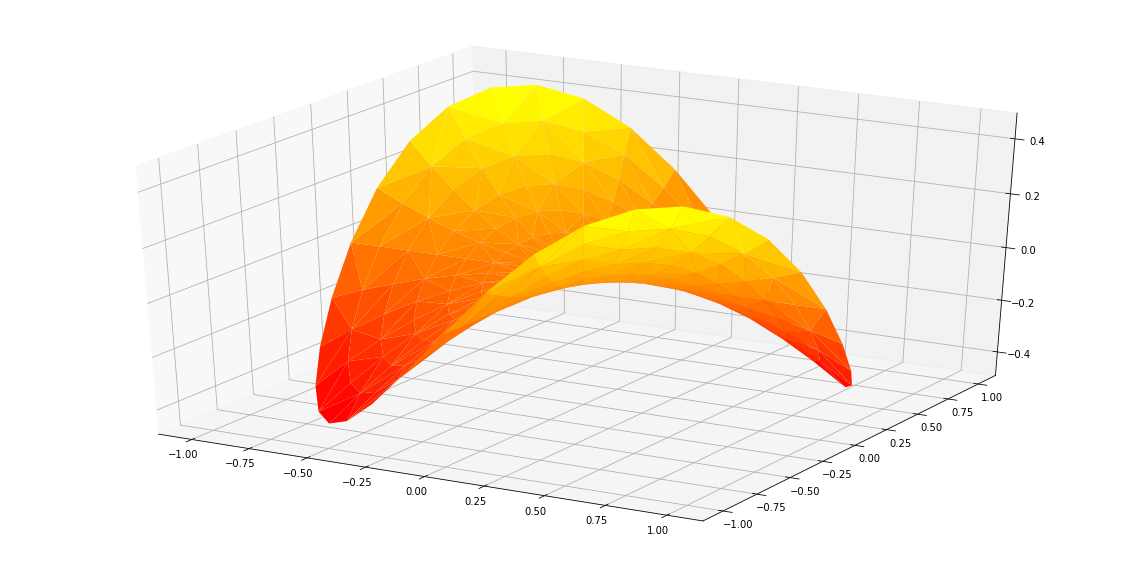

In [50]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

countof_angles = 36
countof_radii  = 8

# array - radii
array_rad = np.linspace(0.125, 1.0, countof_radii)

# array - angles
array_ang = np.linspace(0, 2*np.pi, countof_angles, endpoint=False)

# repeat all angles per radius
array_ang = np.repeat(array_ang[...,np.newaxis], countof_radii, axis=1)

# from polar (radii, angles) coords to cartesian (x, y) coords
x = np.append(0, (array_rad*np.cos(array_ang)).flatten())
y = np.append(0, (array_rad*np.sin(array_ang)).flatten())

# saddle shaped surface
z = np.sin(-x*y)

fig = plt.figure(figsize=(20,10))
ax  = fig.gca(projection='3d')

ax.plot_trisurf(x, y, z, cmap=cm.autumn, linewidth=0.2)

plt.show()

## Tossing a Coin Simulation

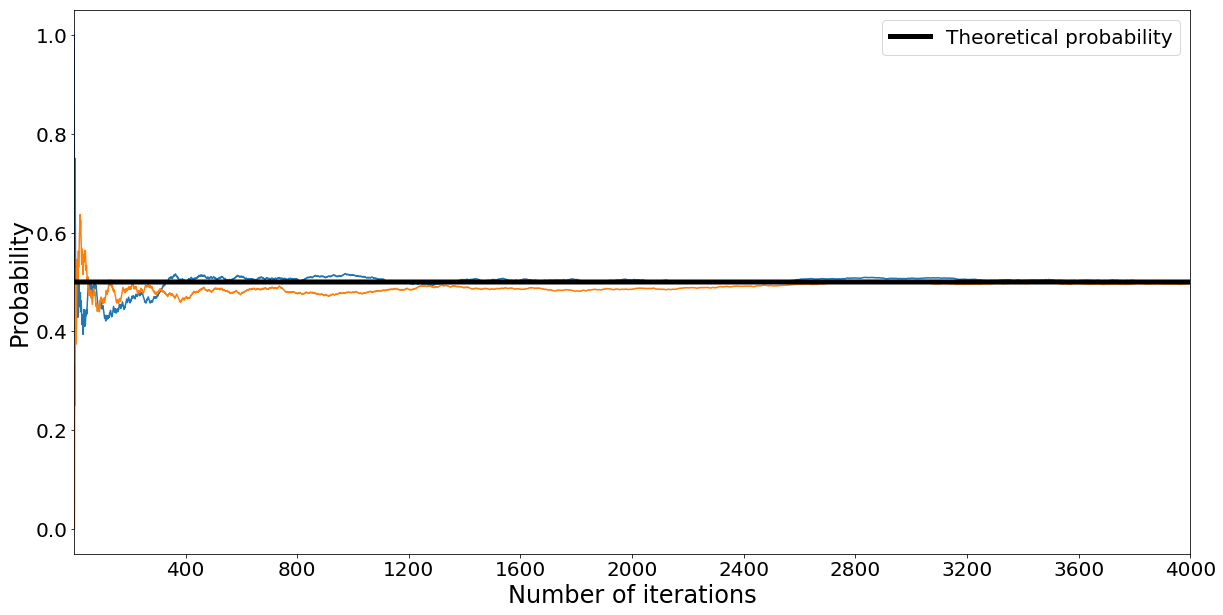

In [52]:
for simulations in range(0, 2):
    count = 0
    tosses = np.random.randint(2, size=4000)
    P_heads = []
    
    for i in range(1, 4001):
        index1 = [j for j in range(0, i) if tosses[j] == 1]
        P_heads.append(len(index1) / i)
        
    plt.xlabel('Number of iterations', fontsize=24)
    plt.ylabel('Probability', fontsize=24)
    plt.plot(np.arange(1, 4001), P_heads[0:4000])
    plt.gcf().set_size_inches(20, 10) #returns the current figure
    plt.gca().set_xlim([1, 4000]) #returns the current axes
    plt.xticks(np.arange(400, 4001, 400), fontsize=20)
    plt.yticks(fontsize=20)
plt.plot(range(0, 4000), [1 / 2] * 4000, 'k', linewidth=5.0, label = 'Theoretical probability')
plt.legend(fontsize=20)
plt.show()

## Folium

In [64]:
import folium
map_bishkek = folium.Map(location=[42.855563, 74.680963], zoom_start = 18)
map_bishkek

<a href='https://github.com/python-visualization/folium/blob/master/examples/data/world-countries.json'> Folium World Map </a>

In [60]:
folium.Map(location=[42.855563, 74.680963],
           tiles='Stamen Toner',
           zoom_start=13)

In [136]:
map_alatoo = folium.Map(location=[42.855563, 74.680963], zoom_start = 17)
folium.Marker([42.855763, 74.680963], popup='International Ala-Too University').add_to(map_alatoo)
folium.Marker([42.855563, 74.682563], popup='Ayaldama').add_to(map_alatoo)
folium.CircleMarker([42.856263, 74.676863], radius=80, popup='Seytek', color='red', fill_color='blue').add_to(map_alatoo)
map_alatoo

In [74]:
import folium
map_nookat = folium.Map(location=[40.267663, 72.620595], zoom_start = 18)
folium.Marker([40.267663, 72.620595], popup='Musa Agaydyn uyu').add_to(map_nookat)
map_nookat

### Misc

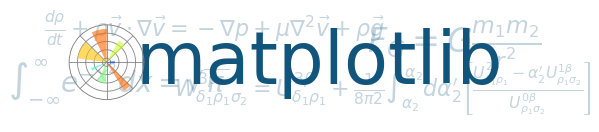

In [75]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as cm

mpl.rcParams['xtick.labelsize'] = 10
mpl.rcParams['ytick.labelsize'] = 12
mpl.rcParams['axes.edgecolor'] = 'gray'


axalpha = 0.05
figcolor = 'white'
dpi = 80
fig = plt.figure(figsize=(6, 1.1), dpi=dpi)
fig.patch.set_edgecolor(figcolor)
fig.patch.set_facecolor(figcolor)


def add_math_background():
    ax = fig.add_axes([0., 0., 1., 1.])

    text = []
    text.append(
        (r"$W^{3\beta}_{\delta_1 \rho_1 \sigma_2} = "
         r"U^{3\beta}_{\delta_1 \rho_1} + \frac{1}{8 \pi 2}"
         r"\int^{\alpha_2}_{\alpha_2} d \alpha^\prime_2 "
         r"\left[\frac{ U^{2\beta}_{\delta_1 \rho_1} - "
         r"\alpha^\prime_2U^{1\beta}_{\rho_1 \sigma_2} "
         r"}{U^{0\beta}_{\rho_1 \sigma_2}}\right]$", (0.7, 0.2), 20))
    text.append((r"$\frac{d\rho}{d t} + \rho \vec{v}\cdot\nabla\vec{v} "
                 r"= -\nabla p + \mu\nabla^2 \vec{v} + \rho \vec{g}$",
                 (0.35, 0.9), 20))
    text.append((r"$\int_{-\infty}^\infty e^{-x^2}dx=\sqrt{\pi}$",
                 (0.15, 0.3), 25))
    text.append((r"$F_G = G\frac{m_1m_2}{r^2}$",
                 (0.85, 0.7), 30))
    for eq, (x, y), size in text:
        ax.text(x, y, eq, ha='center', va='center', color="#11557c",
                alpha=0.25, transform=ax.transAxes, fontsize=size)
    ax.set_axis_off()
    return ax


def add_matplotlib_text(ax):
    ax.text(0.95, 0.5, 'matplotlib', color='#11557c', fontsize=65,
            ha='right', va='center', alpha=1.0, transform=ax.transAxes)


def add_polar_bar():
    ax = fig.add_axes([0.025, 0.075, 0.2, 0.85], projection='polar')

    ax.patch.set_alpha(axalpha)
    ax.set_axisbelow(True)
    N = 7
    arc = 2. * np.pi
    theta = np.arange(0.0, arc, arc/N)
    radii = 10 * np.array([0.2, 0.6, 0.8, 0.7, 0.4, 0.5, 0.8])
    width = np.pi / 4 * np.array([0.4, 0.4, 0.6, 0.8, 0.2, 0.5, 0.3])
    bars = ax.bar(theta, radii, width=width, bottom=0.0)
    for r, bar in zip(radii, bars):
        bar.set_facecolor(cm.jet(r/10.))
        bar.set_alpha(0.6)

    ax.tick_params(labelbottom=False, labeltop=False,
                   labelleft=False, labelright=False)

    ax.grid(lw=0.8, alpha=0.9, ls='-', color='0.5')

    ax.set_yticks(np.arange(1, 9, 2))
    ax.set_rmax(9)


if __name__ == '__main__':
    main_axes = add_math_background()
    add_polar_bar()
    add_matplotlib_text(main_axes)
    plt.show()


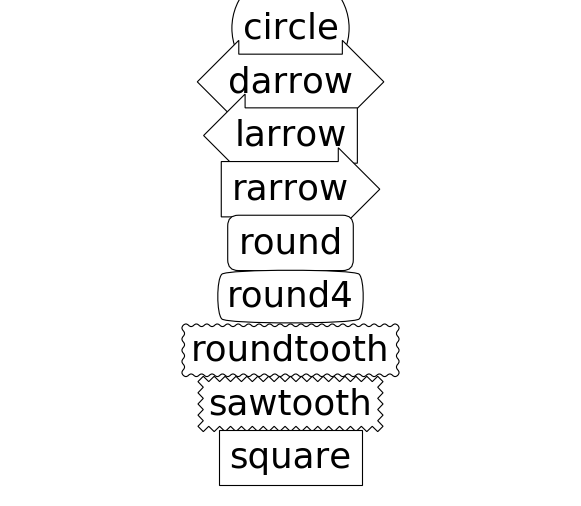

In [76]:
import matplotlib.patches as mpatch
import matplotlib.pyplot as plt

figheight = 8
fig = plt.figure(1, figsize=(9, figheight), dpi=80)
fontsize = 0.4 * fig.dpi

def make_boxstyles(ax):
    styles = mpatch.BoxStyle.get_styles()

    for i, (stylename, styleclass) in enumerate(sorted(styles.items())):
        ax.text(0.5, (float(len(styles)) - 0.5 - i)/len(styles), stylename,
                  ha="center",
                  size=fontsize,
                  transform=ax.transAxes,
                  bbox=dict(boxstyle=stylename, fc="w", ec="k"))

ax1 = fig.add_subplot(111, frameon=False, xticks=[], yticks=[])
make_boxstyles(ax1)



plt.show()

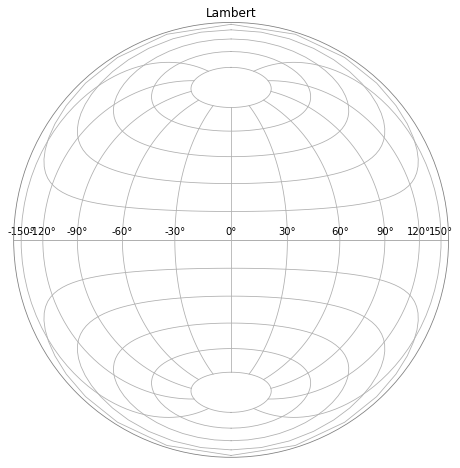

In [85]:
plt.figure(figsize= (8,8))
plt.subplot(111, projection="lambert") #aitoff, hammer, lambert, mollweide
plt.title("Lambert")
plt.grid(True)
plt.show()

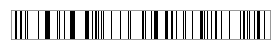

In [124]:
# Fixing random state for reproducibility
np.random.seed(0)


# the bar
x = np.where(np.random.rand(500) > 0.7, 1.0, 0.0)

axprops = dict(xticks=[], yticks=[])
barprops = dict(aspect='auto', cmap=plt.cm.binary, interpolation='nearest')

fig = plt.figure()

# a horizontal barcode
ax = fig.add_axes([0.3, 0.1, 0.6, 0.1], **axprops)
ax.imshow(x.reshape((1, -1)), **barprops)


plt.show()

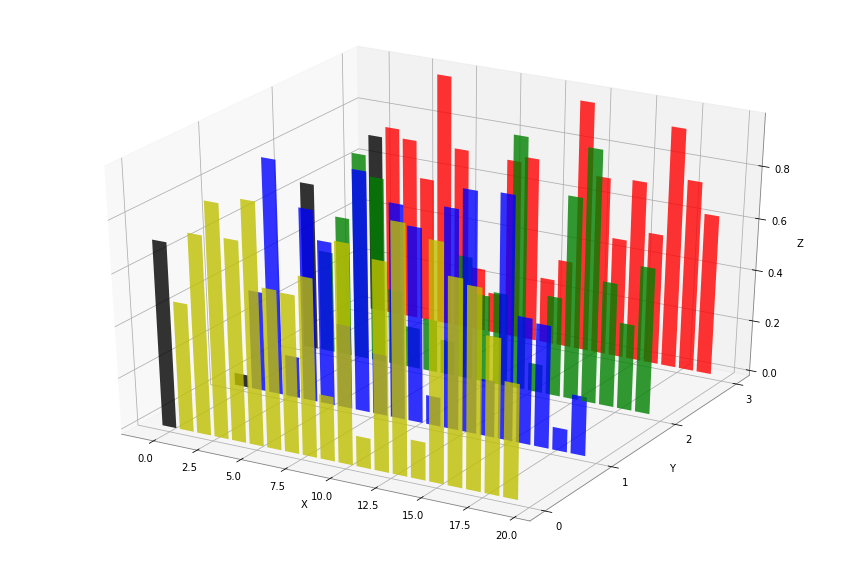

In [128]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)


fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection='3d')

colors = ['r', 'g', 'b', 'y']
yticks = [3, 2, 1, 0]
for c, k in zip(colors, yticks):
    # Generate the random data for the y=k 'layer'.
    xs = np.arange(20)
    ys = np.random.rand(20)

    # You can provide either a single color or an array with the same length as
    # xs and ys. To demonstrate this, we color the first bar of each set cyan.
    cs = [c] * len(xs)
    cs[0] = 'k'

    # Plot the bar graph given by xs and ys on the plane y=k with 80% opacity.
    ax.bar(xs, ys, zs=k, zdir='y', color=cs, alpha=0.8)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# On the y axis let's only label the discrete values that we have data for.
ax.set_yticks(yticks)

plt.show()

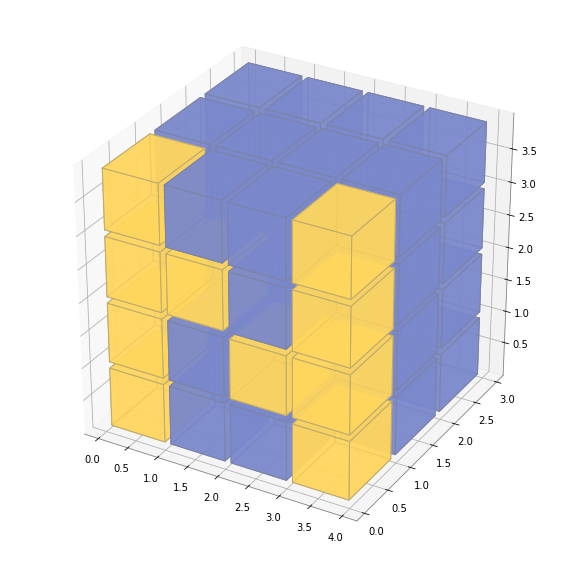

In [130]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D


def explode(data):
    size = np.array(data.shape)*2
    data_e = np.zeros(size - 1, dtype=data.dtype)
    data_e[::2, ::2, ::2] = data
    return data_e

# build up the numpy logo
n_voxels = np.zeros((4, 3, 4), dtype=bool)
n_voxels[0, 0, :] = True
n_voxels[-1, 0, :] = True
n_voxels[1, 0, 2] = True
n_voxels[2, 0, 1] = True
facecolors = np.where(n_voxels, '#FFD65DC0', '#7A88CCC0')
edgecolors = np.where(n_voxels, '#BFAB6E', '#7D84A6')
filled = np.ones(n_voxels.shape)

# upscale the above voxel image, leaving gaps
filled_2 = explode(filled)
fcolors_2 = explode(facecolors)
ecolors_2 = explode(edgecolors)

# Shrink the gaps
x, y, z = np.indices(np.array(filled_2.shape) + 1).astype(float) // 2
x[0::2, :, :] += 0.05
y[:, 0::2, :] += 0.05
z[:, :, 0::2] += 0.05
x[1::2, :, :] += 0.95
y[:, 1::2, :] += 0.95
z[:, :, 1::2] += 0.95

fig = plt.figure(figsize = (10,10))
ax = fig.gca(projection='3d')
ax.voxels(x, y, z, filled_2, facecolors=fcolors_2, edgecolors=ecolors_2)

plt.show()